In [23]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import gc, sys

In [24]:
#reading the data
data=pd.read_csv('creditcard.csv')
print("Observations:"+ str(len(data)))
print("Variables:" + str(len(data.columns)))
data.head()

Observations:284807
Variables:31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
#inflating the dataset to match it with dataset used by financial institution which is usually very large
n_replicas=10
big_data=pd.DataFrame(np.repeat(data.values,n_replicas, axis=0), columns=data.columns)
print("Observations:"+ str(len(big_data)))
print("Variables:" + str(len(big_data.columns)))
big_data.head()

Observations:2848070
Variables:31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


#last variable is Class which is target variable
#value of class would be 1(in case if fraud) and 0(otherwise)

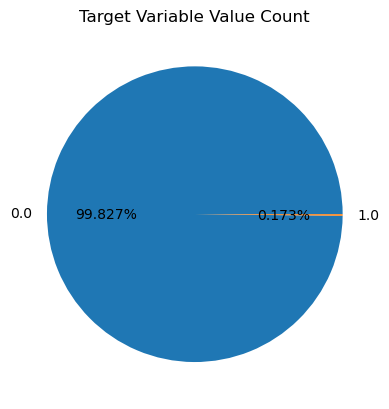

In [26]:
#distinct classes
labels=big_data.Class.unique()

#count
sizes= big_data.Class.value_counts().values

#plotting the count
fix,ax=plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Count')
plt.show()

The dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. 

In [27]:
#preprocessing the dataset
big_data.iloc[:,1:30]=StandardScaler().fit_transform(big_data.iloc[:,1:30])
data_matrix=big_data.values

#X- feature matrix
X=data_matrix[:,1:30]

#y- labels vector
y=data_matrix[:,30]

X=normalize(X,norm='l1')
print('X.shape=',X.shape)
print('y shape=',y.shape)

X.shape= (2848070, 29)
y shape= (2848070,)


In [28]:
#memory management; so we delete data and big_data
del data
del big_data
gc.collect()

2767

In [29]:
#training the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


Decision Tree

In [30]:
#input sample weight
w_train=compute_sample_weight('balanced', y_train)


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score


In [32]:
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

In [33]:
#recording training time
t0=time.time()
sklearn_dt.fit(X_train,y_train,sample_weight=w_train)
sklearn_time= time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  34.78921


In [34]:
#probability of the positive class
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]

In [36]:
#calculate fpr, tpr, thresholds
fpr,tpr,thresholds= roc_curve(y_test, sklearn_pred)

In [35]:
#ROC-AUC score prediction
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.966


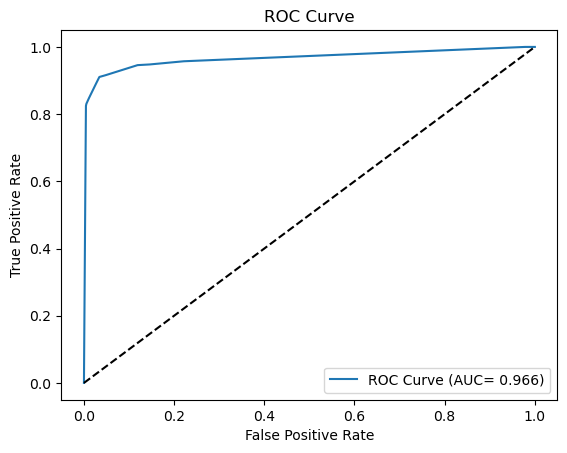

In [37]:
plt.plot(fpr,tpr,label='ROC Curve (AUC= %0.3f)'%sklearn_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()